In [19]:
import torch 
from torchvision import transforms, datasets

import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('aerialmodel.pth')

In [31]:
def predict_image(image):
  from torch.autograd import Variable
  test_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor(),
  ])
  image_tensor = test_transforms(image).float()
  image_tensor = image_tensor.unsqueeze_(0)
  input = Variable(image_tensor)
  input = input.to(device)
  output = model(input)
  index = output.data.cpu().numpy().argmax()
  return index


def get_random_images(num, data_dir):
  import numpy as np
  test_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor(),
  ])
  data = datasets.ImageFolder(data_dir,test_transforms)
  classes = data.classes
  indices = list(range(len(data)))
  np.random.shuffle(indices)
  idx = indices[:num]

  from torch.utils.data.sampler import SubsetRandomSampler
  from torch.utils.data import DataLoader
  sampler = SubsetRandomSampler(idx)
  loader = DataLoader(data,sampler=sampler,batch_size=num)
  
  dataiter = iter(loader)
  images, labels = dataiter.next()

  return images, labels

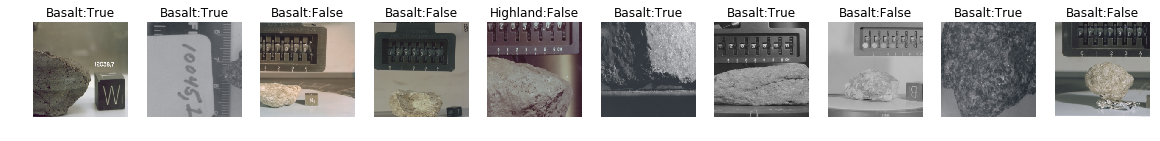

In [33]:
# Get five random images and display them in a figure with their labels
to_pil = transforms.ToPILImage()
images, labels = get_random_images(10, 'Data')
fig=plt.figure(figsize=(20,10))

# Load all of the classes from the training loader
classes=datasets.ImageFolder('Data').classes

# Loop through the 5 randomly selected images
for ii in range(len(images)):

    # Predict the class of each image
    image = to_pil(images[ii])
    index = predict_image(image)

    # Add the class to the plot graph to display beneath the image
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)

# Reshow the plot with the predicted labels beneath the images
plt.show()